In [2]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [36]:
dphom = pd.read_csv('deltap_hom.csv', header=None, index_col=None)
dphom = dphom.loc[dphom.index >= 0]
dphom.shape

(51, 200)

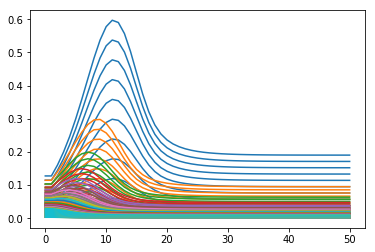

In [37]:
plt.plot(dphom.index, dphom.values)
plt.show()

In [34]:
dpfrac = pd.read_csv('deltap_frac.csv', header=None, index_col=None)
#dpfrac = dpfrac.loc[dpfrac.index >= 0]
dpfrac.shape

(51, 200)

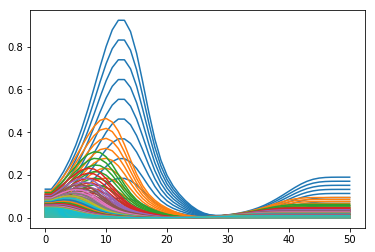

In [35]:
plt.plot(dpfrac.index, dpfrac.values)
plt.show()

In [31]:
dpfault = pd.read_csv('deltap_fault.csv', header=None, index_col=None)
#for i in [20, 50, 100]:
#    df = pd.read_csv(f'deltap_fault_{i}.csv', header=None, index_col=0)
#    dpfault = pd.concat([dpfault, df], axis=1)

dpfault = dpfault.loc[dpfault.index >= 0]

In [32]:
dpfault.shape

(51, 200)

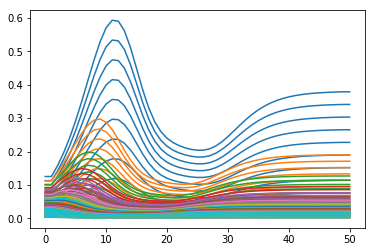

In [33]:
plt.plot(dpfault.index, dpfault.values)
plt.show()

## Merging the scenarios

In [38]:
pwf_hom = pd.read_csv('pwf_hom.csv', header=None, index_col=None)
pwf_frac = pd.read_csv('pwf_frac.csv', header=None, index_col=None)
pwf_fault = pd.read_csv('pwf_fault.csv', header=None, index_col=None)

full_pwf = pd.concat([pwf_hom, pwf_frac, pwf_fault], axis=1)
full_pwf.columns = list(range(1, full_pwf.shape[1]+1))
full_pwf.to_csv('synth_pwf.csv', sep=',', encoding='UTF-8', header=True)

In [39]:
full_dp = pd.concat([dphom, dpfrac, dpfault], axis=1)
full_dp.columns = list(range(1, full_dp.shape[1]+1))
full_dp = full_dp.drop(full_dp.index[[0, 50]]) # Dropping the first and last timesteps, since they are repeated
full_dp.to_csv('synth_dp.csv', sep=',', encoding='UTF-8', header=True, index=False)

In [40]:
classes = ['HOMOGENEOUS'] * dphom.shape[1]
classes.extend(['FRACTURE'] * dpfrac.shape[1])
classes.extend(['FAULT'] * dpfault.shape[1])

classes = pd.Series(data=classes, index=full_dp.columns, name='class')
classes.to_csv('synth_labels.csv', sep=',', encoding='UTF-8', header='class', index=True, index_label='scenario_id')